<a href="https://colab.research.google.com/github/alejandrodgb/fastai/blob/main/clean/02_pet_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup notebook

In [1]:
import sys

if 'google.colab' in sys.modules:
    ! [ -e /content ] && pip install -Uqq fastbook
    !pip install nbdev
    
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 279.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# Train model

In [3]:
# Get data
path = untar_data(URLs.PETS)

In [ ]:
# Create data loaders
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=Pipeline([attrgetter("name"), 
                    RegexLabeller(pat = r'(.+)_\d+.(jpg|png)$')]),
    splitter=RandomSplitter(),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms()
)

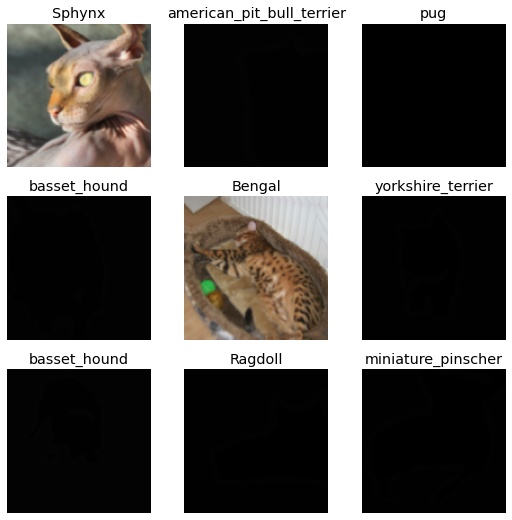

In [ ]:
dls = pets.dataloaders(path)
dls.train.show_batch()

In [ ]:
# Create and train vision learner
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.986711,2.170560,0.411705,01:32


epoch,train_loss,valid_loss,accuracy,time
0,2.321377,1.904886,0.459066,01:11
1,2.109155,1.813534,0.473275,01:08
2,2.021301,1.772116,0.487483,01:09
3,1.810468,1.638153,0.520298,01:10
4,1.688616,1.562819,0.535859,01:08
5,1.515137,1.490492,0.564614,01:07
6,1.430595,1.446564,0.569689,01:10
7,1.391474,1.441873,0.567997,01:07


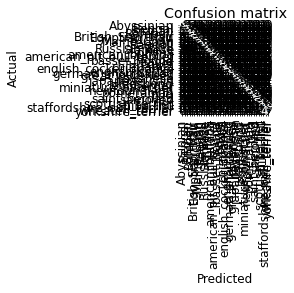

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

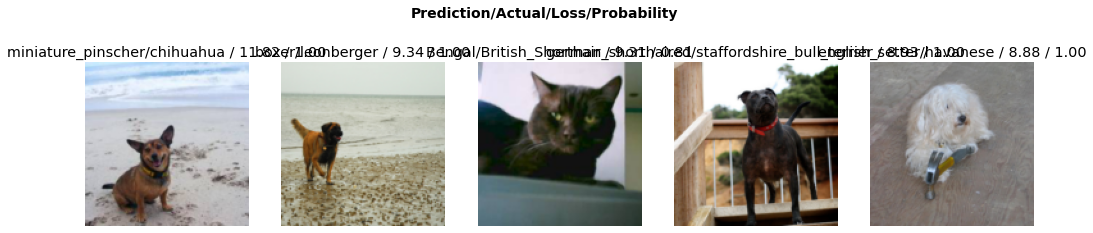

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
learn.export('gdrive/MyDrive/Colab Notebooks/pet-recogniser.pkl')

# Create